# Data Analysis

## Setup
### Import libraries

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import wordlemodule
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns

### Open data from saved file and create a WordleModule object with it

In [2]:
# Open pickle file
with open('Data/Script data/Imported_email_data_with_ints.pkl','rb') as file:
    full_data = pickle.load(file)

# Create custom wordle object with input data
data = wordlemodule.WordleData(full_data)

## Plots

### Histogram of average solve score

C:\Users\Andrés\AppData\Local\Temp\ipykernel_15944\3064279702.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['','1','2','3','4','5','6','Unsolved'])


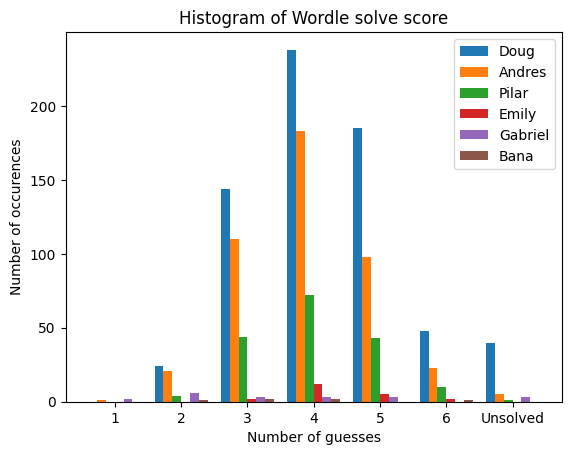

In [3]:
hist_solve_score = plt.figure(1)
ax = hist_solve_score.subplots()

ax.hist(data.data_arr, bins=np.arange(0.5,8.5,1))

ax.set_ylabel('Number of occurences')
ax.set_xlabel('Number of guesses')
ax.set_xticklabels(['','1','2','3','4','5','6','Unsolved'])
ax.set_title('Histogram of Wordle solve score')
ax.legend(data.data_dict.keys())

### Solve score over time

To calculate 

Text(0.5, 0.01, 'Puzzle number')

<Figure size 640x480 with 0 Axes>

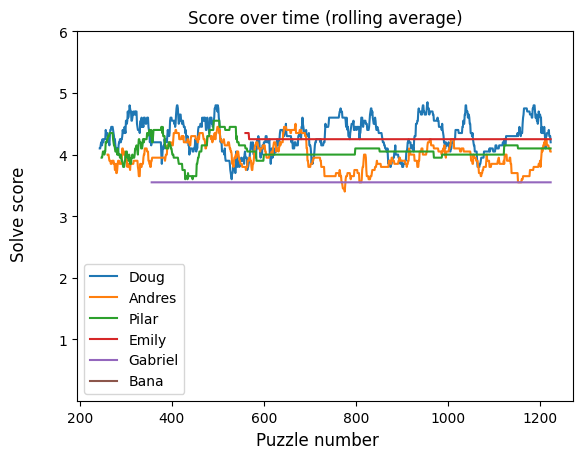

In [4]:
# Set up pandas dataframe with rolling average
df = data.rolling(20)


# Plot scatterplot for solve score over time
score_over_time = plt.figure(2)

fig, ax = plt.subplots()
plot = df.plot(title="Score over time (rolling average)",
               subplots=False,
               ax=ax, 
               sharey=True, 
               sharex=True,
               ylim=[0,6], 
               yticks=range(1,7,1))

#for myax in plot:
#    myax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#fig.tight_layout()
fig.supylabel('Solve score')
fig.supxlabel('Puzzle number')

### Solve score over time (heatmap)


[Text(0.5, 1.0, 'Solve score over time'),
 Text(0.5, 23.52222222222222, 'Puzzle number')]

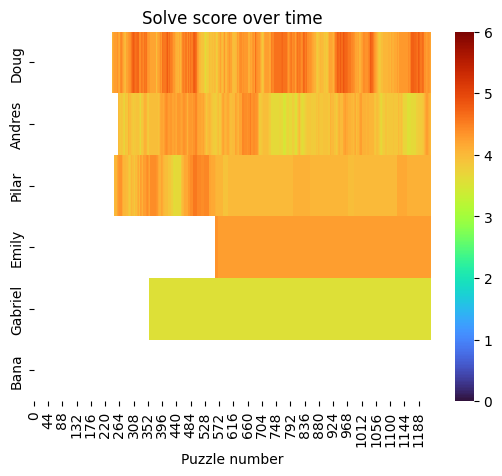

In [5]:
# Set up pandas dataframe with rolling average
df = data.rolling(20)

# Plot
ax = sns.heatmap(df.transpose(),
                 cmap='turbo',
                 vmin=0,
                 vmax=6)
ax.set(title='Solve score over time',
       xlabel='Puzzle number')

### By week-day: avg num games played, average solve score

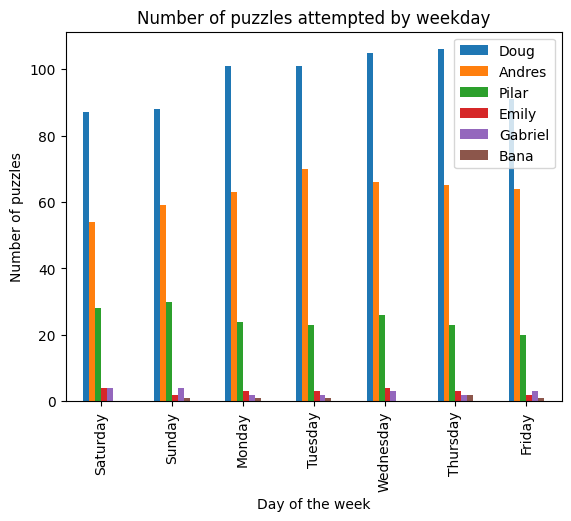

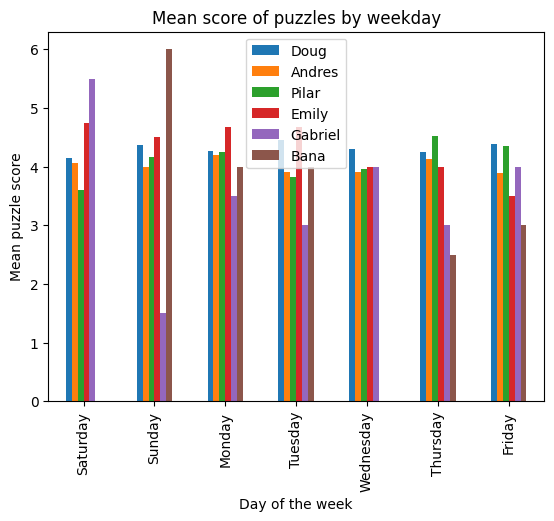

In [6]:
df_weekly_sum, df_weekly_score = data.weekly()

# Plot
ax = df_weekly_sum.plot.bar(title = 'Number of puzzles attempted by weekday',
                            ylabel='Number of puzzles')

# Plot
ax = df_weekly_score.plot.bar(title = 'Mean score of puzzles by weekday',
                            ylabel='Mean puzzle score')

### Longest streak (win and no play)

### Scatterplot
- compare score of each game - are same words hard for everyone?
Make regressions for each comparison to see who tracks the best

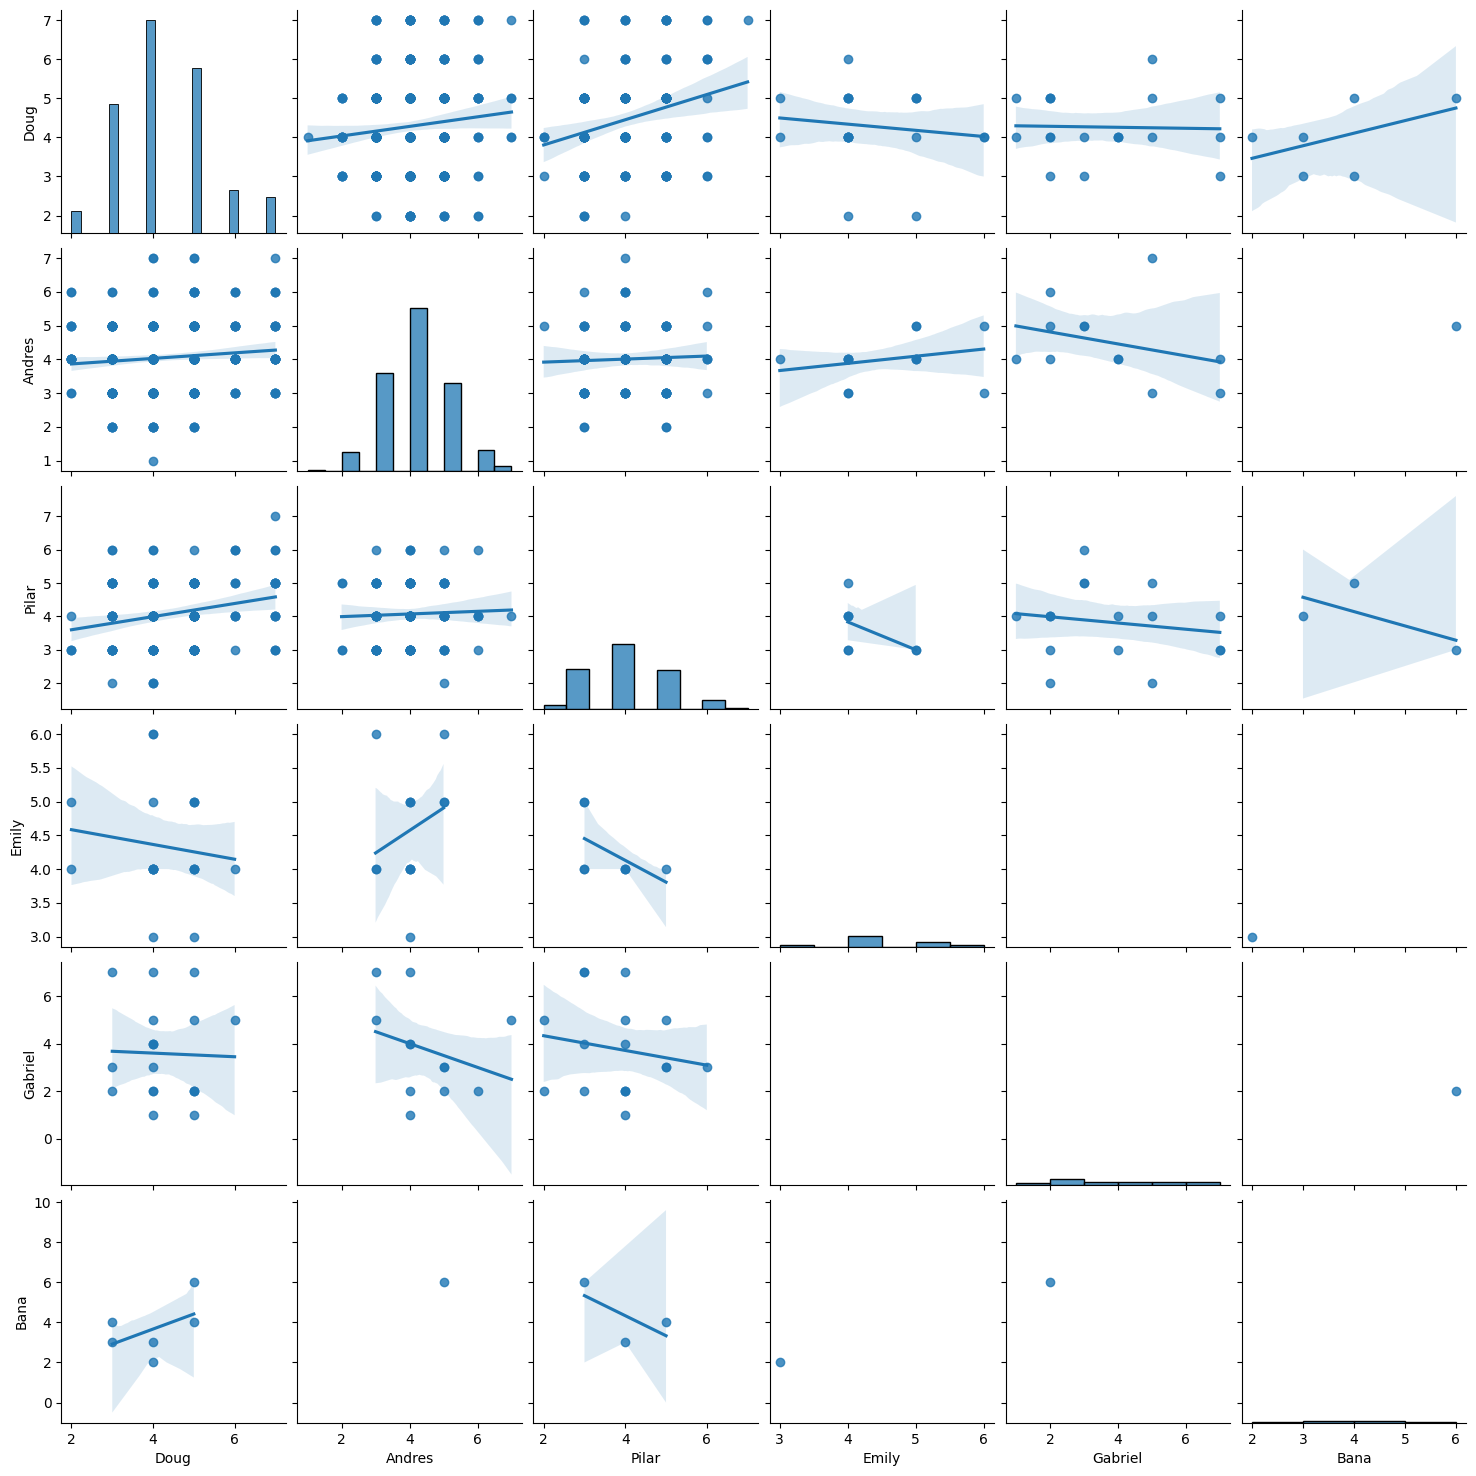

In [7]:
# Seaborn pairplot of each person's score compared to others
df = pd.DataFrame(data.data_arr, columns=data.data_dict.keys())
g = sns.pairplot(df,kind='reg')

# Calculate Pearson's r-squared and t-test p-values

#df_rsq, df_p = data.corr_pvals()

#def corrfunc(x, y, ax=None, hue=None, **kws):
#    temp = df.corr()
#    ax = ax or plt.gca()
#    ax.annotate(f'r-sqr = {temp:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

#g.map_lower(corrfunc)



<Axes: ylabel='Doug'>

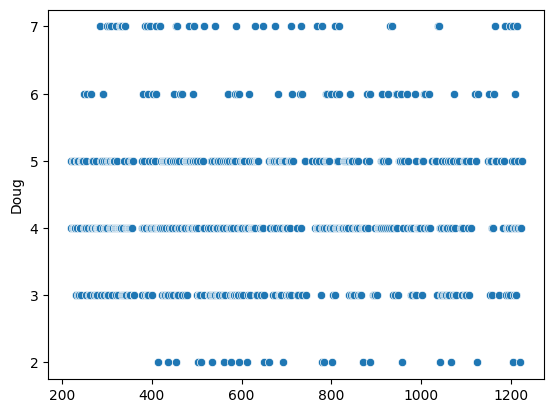

In [ ]:
df = pd.DataFrame(data.data_arr, columns=data.data_dict.keys())

### Which letter slots are easiest to guess? Slot 1?

### What are the most common letter patterns and their guess rates?